In [17]:
import pandas as pd

df = pd.read_csv('wavelet.csv')

In [18]:
X = df.iloc[:, :-1]

Y = df.iloc[:, -1]

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [21]:
y_pred = bst.predict(X_val)

In [22]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_pred, y_val)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5777063236870311


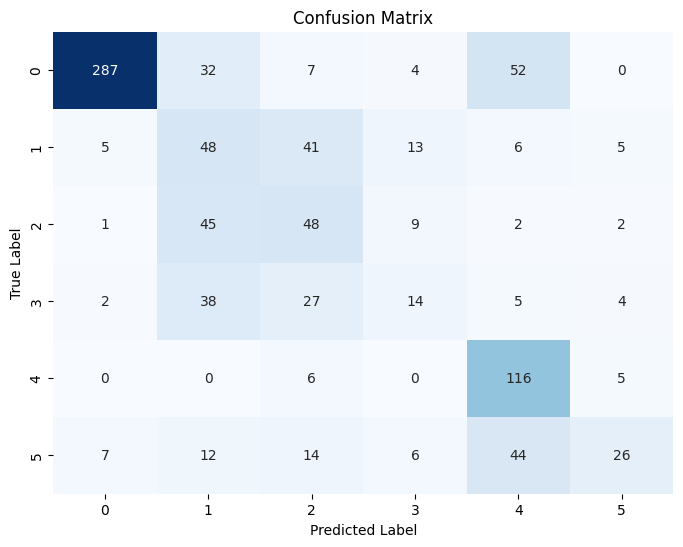

In [23]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have true labels (y_actual) and predicted labels (y_pred)
# For each class (0, 1, 2, 3), calculate precision, recall, and F1 score
precision = precision_score(y_val, y_pred, average=None)
recall = recall_score(y_val, y_pred, average=None)
f1 = f1_score(y_val, y_pred, average=None)

# Print results for each class
for class_label in range(6):
    print(f"Class {class_label}:")
    print(f"Precision: {precision[class_label]:.4f}")
    print(f"Recall: {recall[class_label]:.4f}")
    print(f"F1 Score: {f1[class_label]:.4f}\n")


Class 0:
Precision: 0.9503
Recall: 0.7513
F1 Score: 0.8392

Class 1:
Precision: 0.2743
Recall: 0.4068
F1 Score: 0.3276

Class 2:
Precision: 0.3357
Recall: 0.4486
F1 Score: 0.3840

Class 3:
Precision: 0.3043
Recall: 0.1556
F1 Score: 0.2059

Class 4:
Precision: 0.5156
Recall: 0.9134
F1 Score: 0.6591

Class 5:
Precision: 0.6190
Recall: 0.2385
F1 Score: 0.3444



# Label Mapping

In [26]:
def predictionMapping(prediction):
	if prediction == 0 or prediction == 4:
		return 0
	elif prediction == 5:
		return 1
	else:
		return 2

# Night Time


In [12]:
for i in range (len(y_pred)):
	y_pred[i] = predictionMapping(y_pred[i])

y_val = y_val.apply(predictionMapping)

In [13]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_pred, y_val)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.8188638799571275


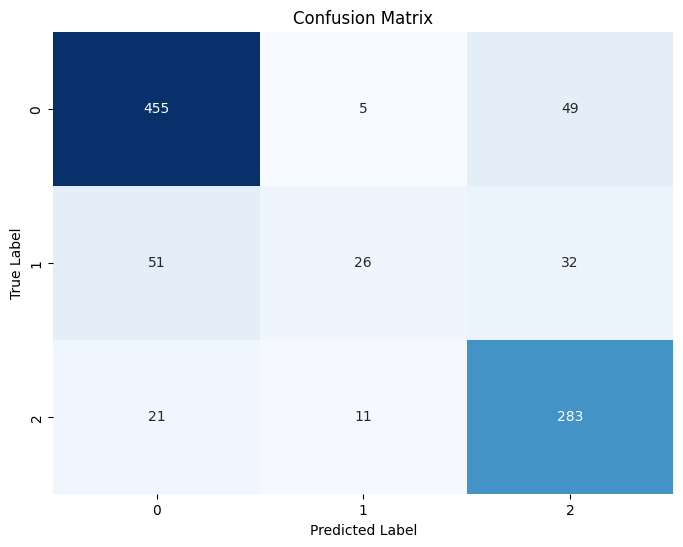

In [14]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [15]:
from sklearn.metrics import f1_score

f1 = f1_score(y_val, y_pred, average='weighted')
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8009


In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have true labels (y_actual) and predicted labels (y_pred)
# For each class (0, 1, 2, 3), calculate precision, recall, and F1 score
precision = precision_score(y_val, y_pred, average=None)
recall = recall_score(y_val, y_pred, average=None)
f1 = f1_score(y_val, y_pred, average=None)

# Print results for each class
for class_label in range(3):
    print(f"Class {class_label}:")
    print(f"Precision: {precision[class_label]:.4f}")
    print(f"Recall: {recall[class_label]:.4f}")
    print(f"F1 Score: {f1[class_label]:.4f}\n")


Class 0:
Precision: 0.8634
Recall: 0.8939
F1 Score: 0.8784

Class 1:
Precision: 0.6190
Recall: 0.2385
F1 Score: 0.3444

Class 2:
Precision: 0.7775
Recall: 0.8984
F1 Score: 0.8336



# Run only upper part until label mapping


In [27]:
night_y_val = []
night_y_pred = []

for i in range (len(y_pred)):
	if y_val.iloc[i] != 5:
		night_y_val.append(predictionMapping(y_val.iloc[i]))
		if y_pred[i] == 5:
			night_y_pred.append(predictionMapping(0))
		else:
			night_y_pred.append(predictionMapping(y_pred[i]))





In [28]:
from sklearn import metrics

accuracy = metrics.accuracy_score(night_y_pred, night_y_val)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9016990291262136


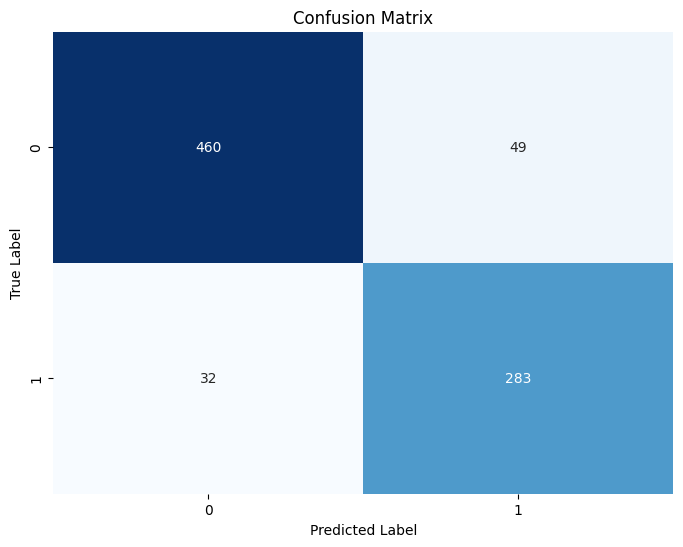

In [29]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(night_y_val, night_y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have true labels (y_actual) and predicted labels (y_pred)
# For each class (0, 1, 2, 3), calculate precision, recall, and F1 score
precision = precision_score(night_y_val, night_y_pred, average=None)
recall = recall_score(night_y_val, night_y_pred, average=None)
f1 = f1_score(night_y_val, night_y_pred, average=None)

# Print results for each class
for class_label in range(2):
    print(f"Class {class_label}:")
    print(f"Precision: {precision[class_label]:.4f}")
    print(f"Recall: {recall[class_label]:.4f}")
    print(f"F1 Score: {f1[class_label]:.4f}\n")


Class 0:
Precision: 0.9350
Recall: 0.9037
F1 Score: 0.9191

Class 1:
Precision: 0.8524
Recall: 0.8984
F1 Score: 0.8748

